# TCRpeg embeddings

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Add autoreload for easier development
%load_ext autoreload
%autoreload 2

In [3]:
from tcrpeg_toolkit.embedding_clustering import EmbeddingClustering
from tcrpeg_toolkit.umap_generator import UMAPGenerator
from tcrpeg_toolkit.embedding_handler import EmbeddingHandler

In [67]:
sample_1 = EmbeddingClustering("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy")

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy


In [82]:
sample_1_clusters = sample_1.run(optimal_cluster=True)

INFO - Finding the optimal number of clusters using the elbow method...
INFO - Based on the rule of thumb, the maximum number of clusters k should be ≤ 15.
WARNING clustering 453 points to 12 centroids: please provide at least 468 training points
WARNING clustering 453 points to 13 centroids: please provide at least 507 training points
WARNING clustering 453 points to 14 centroids: please provide at least 546 training points
WARNING clustering 453 points to 15 centroids: please provide at least 585 training points
INFO - The optimal number of clusters k based on the elbow method is 1.
INFO - Applying hdbscan...
INFO - Silhouette score: 0.08609095215797424
INFO - Davies-Bouldin score: 1.3553803224936847
INFO - Calinski-Harabasz score: 19.027832699884662


Sampling a subset of 256 / 453 for training
Clustering 256 points in 640D to 1 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.01 s
  Iteration 9 (0.00 s, search 0.00 s): objective=762.984 imbalance=1.000 nsplit=0       


In [73]:
sample_1_clusters_umap = UMAPGenerator(sample_1_clusters)

Loaded Embedding Object


In [74]:
sample_1_clusters_umap.run()

In [65]:
import inspect
import seaborn as sns
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10, 8))
print(set(inspect.signature(sns.scatterplot).parameters.keys()))

{'style_order', 'palette', 'markers', 'x', 'sizes', 'ax', 'size_norm', 'hue_norm', 'size', 'kwargs', 'hue', 'size_order', 'hue_order', 'y', 'data', 'legend', 'style'}


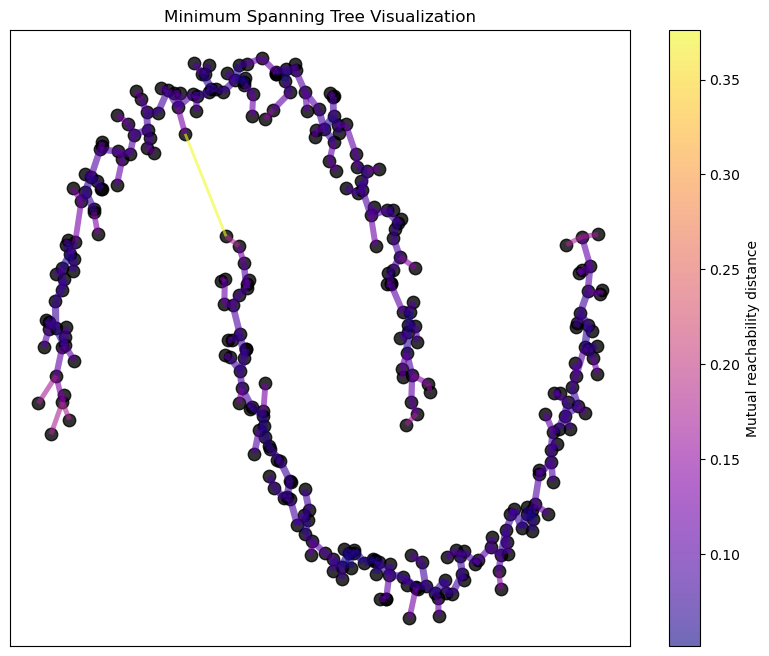

In [78]:
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate sample data
data, _ = make_moons(n_samples=300, noise=0.05)

# Cluster the data with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(data)

# Access the minimum spanning tree
mst = clusterer.minimum_spanning_tree_

# Plot the minimum spanning tree
plt.figure(figsize=(10, 8))
mst.plot(edge_cmap='plasma', 
         edge_alpha=0.6, 
         node_size=80, 
         edge_linewidth=2)
plt.title('Minimum Spanning Tree Visualization')
plt.show()

In [79]:
import networkx as nx
import hdbscan
from sklearn.datasets import make_blobs
import numpy as np

# Generate some data
data, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Cluster the data and generate MST
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(data)
mst = clusterer.minimum_spanning_tree_.to_networkx()

# Create a NetworkX graph from the MST
G = nx.Graph()
for edge in mst.edges(data=True):
    G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

# Calculate graph metrics
degrees = dict(G.degree())
edge_weights = nx.get_edge_attributes(G, 'weight')
average_path_length = nx.average_shortest_path_length(G, weight='weight')
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Print some metrics
print("Degrees:", degrees)
print("Edge Weights:", edge_weights)
print("Average Path Length:", average_path_length)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

Degrees: {47.0: 3, 4.0: 2, 71.0: 2, 21.0: 1, 16.0: 3, 12.0: 3, 19.0: 2, 75.0: 3, 53.0: 2, 11.0: 3, 35.0: 3, 41.0: 3, 20.0: 2, 99.0: 2, 10.0: 2, 44.0: 2, 55.0: 3, 95.0: 3, 30.0: 3, 22.0: 1, 56.0: 2, 2.0: 2, 31.0: 2, 32.0: 4, 38.0: 2, 51.0: 3, 97.0: 2, 7.0: 2, 69.0: 1, 90.0: 3, 84.0: 2, 37.0: 3, 9.0: 2, 17.0: 4, 8.0: 2, 68.0: 2, 26.0: 2, 49.0: 4, 79.0: 2, 81.0: 2, 70.0: 3, 5.0: 1, 28.0: 1, 15.0: 4, 72.0: 1, 46.0: 1, 88.0: 3, 61.0: 1, 42.0: 2, 74.0: 2, 18.0: 1, 60.0: 4, 27.0: 2, 62.0: 2, 77.0: 2, 76.0: 3, 24.0: 3, 6.0: 2, 25.0: 1, 23.0: 1, 94.0: 1, 96.0: 3, 43.0: 1, 98.0: 1, 83.0: 1, 48.0: 2, 54.0: 2, 36.0: 2, 93.0: 2, 45.0: 2, 64.0: 1, 73.0: 3, 57.0: 2, 82.0: 1, 80.0: 1, 14.0: 2, 33.0: 1, 89.0: 2, 63.0: 3, 58.0: 2, 1.0: 2, 67.0: 3, 87.0: 1, 86.0: 1, 52.0: 1, 34.0: 1, 85.0: 2, 13.0: 2, 59.0: 1, 50.0: 2, 0.0: 1, 40.0: 2, 92.0: 1, 65.0: 1, 78.0: 1, 91.0: 1, 3.0: 1, 39.0: 1, 29.0: 1, 66.0: 1}
Edge Weights: {(47.0, 4.0): 0.4058741420787664, (47.0, 71.0): 0.43547590932473856, (47.0, 21.0): 0.5

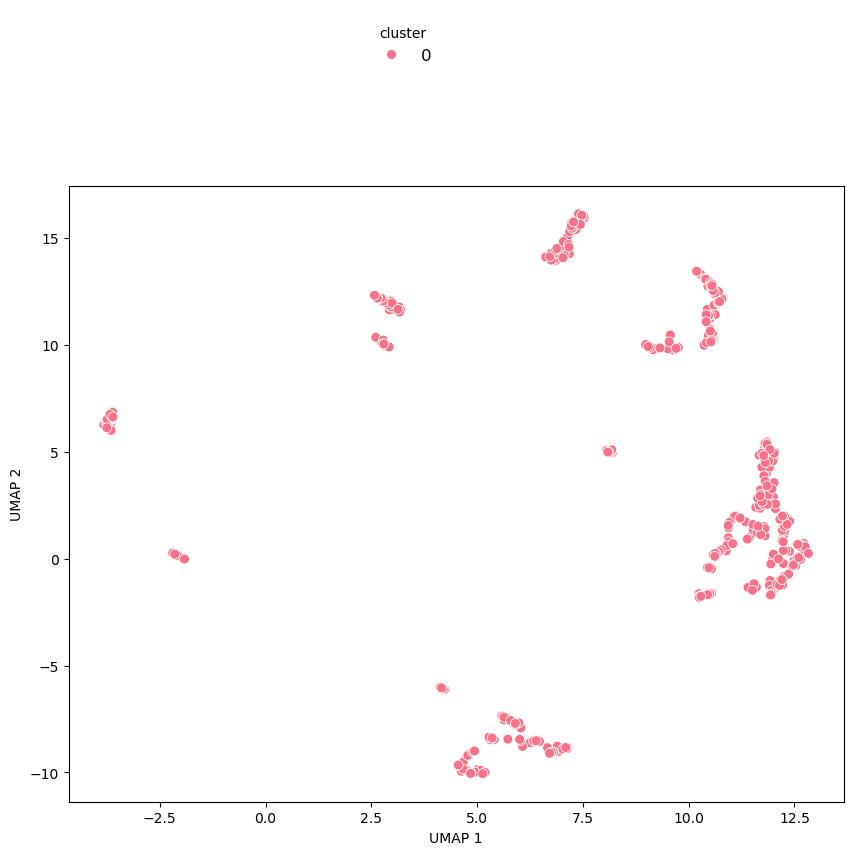

In [56]:
sample_1_clusters_umap.plot_umap(hue='cluster', s=50, frameon=True)

{}
{}


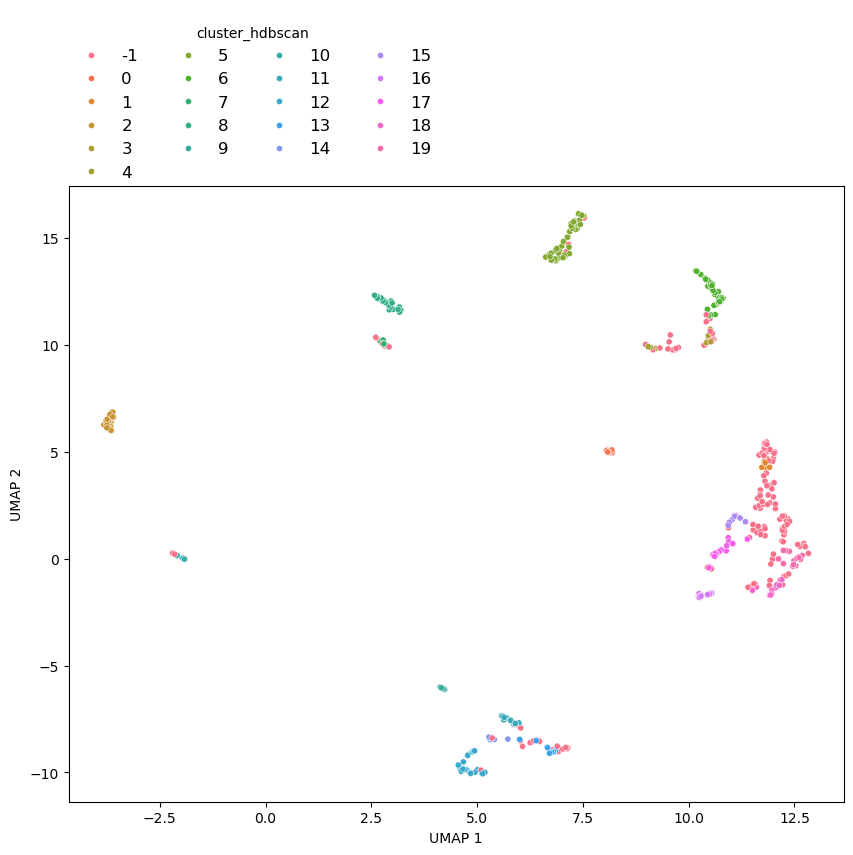

In [75]:
sample_1_clusters_umap.plot_umap(hue='cluster_hdbscan')

## Two samples

In [31]:
sample_1_metadata = pd.read_csv('sample_data/sample_1.csv')
sample_1_metadata['id'] = sample_1_metadata.index

In [32]:
sample_2_metadata = pd.read_csv('sample_data/sample_2.csv')
sample_2_metadata['id'] = sample_2_metadata.index

In [33]:
sample_1_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy", 
                                       name='sample_1', metadata=sample_1_metadata)
sample_2_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy", 
                                       name='sample_2', metadata=sample_2_metadata)

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy
INFO - Data loaded from results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy


In [34]:
sample_1_embeddings

EmbeddingHandler(embeddings_shape=(453, 640), ids_shape=(453,), sequences_shape=(453,), metadata_shape=(453, 3), name=sample_1)

In [35]:
sample_2_embeddings

EmbeddingHandler(embeddings_shape=(1126, 640), ids_shape=(1126,), sequences_shape=(1126,), metadata_shape=(1126, 3), name=sample_2)

In [36]:
samples_all_embeddings = sample_1_embeddings + sample_2_embeddings

In [37]:
samples_all_embeddings

EmbeddingHandler(embeddings_shape=(1579, 640), ids_shape=(1579,), sequences_shape=(1579,), metadata_shape=(1579, 5), name=sample_1_sample_2)

In [38]:
samples_all_clusters = EmbeddingClustering(samples_all_embeddings).run()

INFO - Loaded Embedding Object
INFO - Applying hdbscan...


Sampling a subset of 1024 / 1579 for training
Clustering 1024 points in 640D to 4 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s
  Iteration 9 (0.00 s, search 0.00 s): objective=3621.76 imbalance=1.169 nsplit=0       


INFO - Silhouette score: 0.0896281823515892
INFO - Davies-Bouldin score: 1.819791219970289
INFO - Calinski-Harabasz score: 522.8045106424339


In [39]:
samples_all_clusters_umap = UMAPGenerator(samples_all_clusters)

Loaded Embedding Object


In [40]:
samples_all_clusters_umap.run()

{}
{'edgecolor': 'black'}


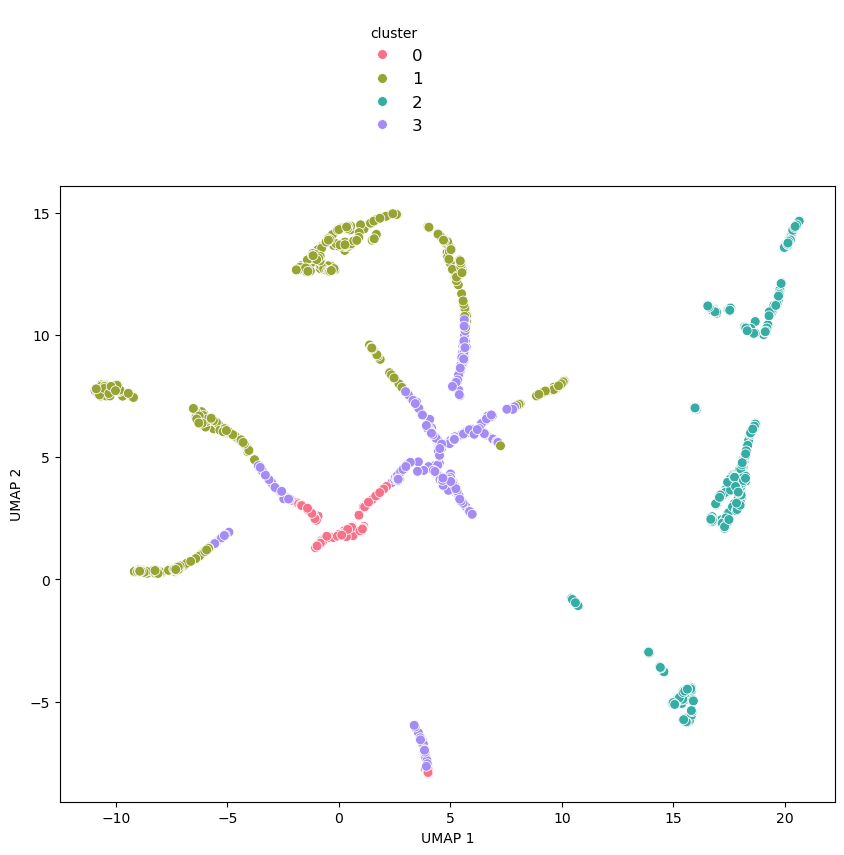

In [63]:
samples_all_clusters_umap.plot_umap(hue='cluster', edgecolor='black', s=50)

{}
{}


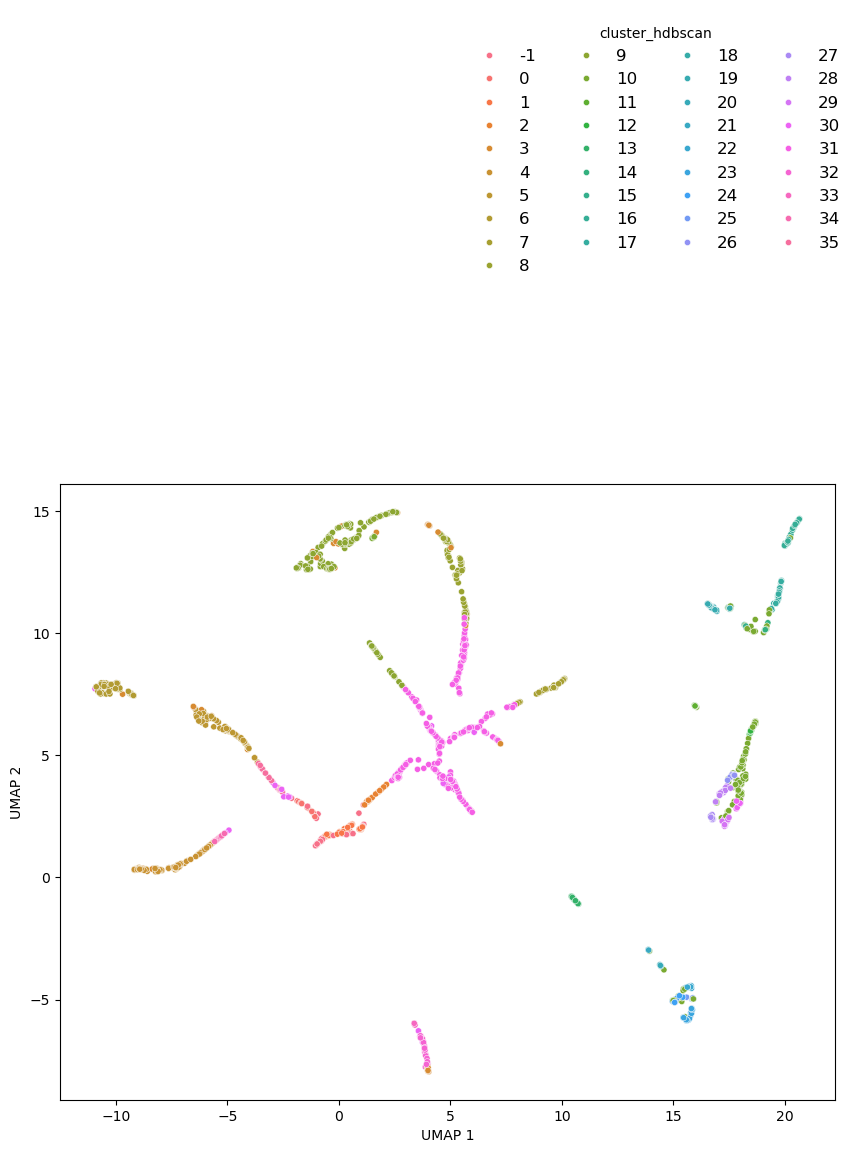

In [42]:
samples_all_clusters_umap.plot_umap(hue='cluster_hdbscan')

In [43]:
samples_all_clusters_umap.plot_interactive_umap(hue='cluster_hdbscan')

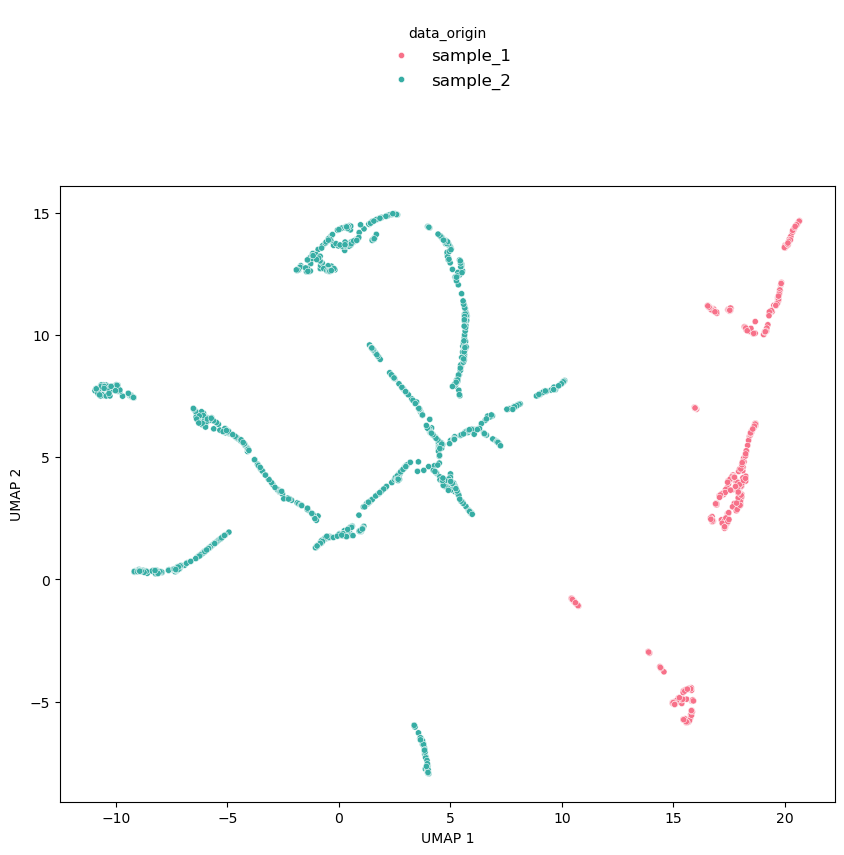

In [60]:
samples_all_clusters_umap.plot_umap(hue='data_origin')

<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

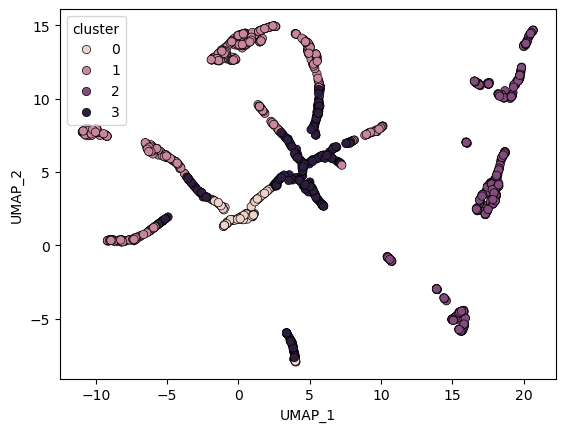

In [61]:
import seaborn as sns
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=samples_all_clusters_umap.umap_data, hue='cluster', edgecolor='black')